In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df['targets'] = pd.Series(iris.target)
df['Iris_name'] = df['targets'].apply(lambda x: 'setosa' if x == 0 else 
                                      ('versicolor' if x == 1 else 'virginica'))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,Iris_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [32]:
# convert to binary
df["Iris_name"] = df["Iris_name"].replace(["setosa", "versicolor", "virginica"], [0, 1, 2]) 

C:\Users\User\AppData\Local\Temp\ipykernel_22428\4219072652.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Iris_name"] = df["Iris_name"].replace(["setosa", "versicolor", "virginica"], [0, 1, 2])


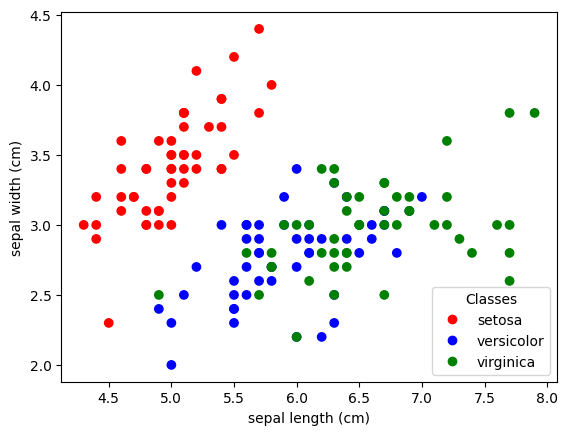

In [33]:
cmap = ["red", "blue", "green"]
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=ListedColormap(cmap))
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

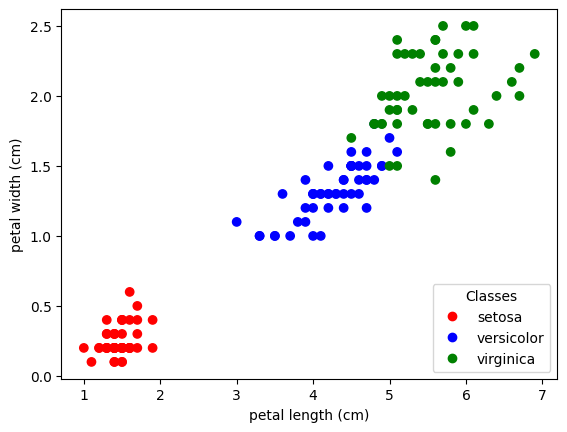

In [34]:
cmap = ["red", "blue", "green"]
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, cmap=ListedColormap(cmap))
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [35]:
X = np.array([df["sepal length (cm)"], df["sepal width (cm)"], df["petal length (cm)"], 
              df["petal width (cm)"]]).T
y = np.array(df["Iris_name"], dtype=int)
# X

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [38]:
from knn import KNN

In [39]:
knn = KNN(k=7)
knn.fit(X_train, y_train)

In [40]:
new_iris = np.array([4.5, 3.3 , 1.4, 0.1])
new_iris_2 = np.array([5.4, 3.9, 1.7, 1.4])
new_iris_3 = np.array([6.1, 3.0 , 5.0, 2.1])

new_irises = [new_iris, new_iris_2, new_iris_3]

outputs = knn.predict(new_irises)

In [41]:
for output in outputs:
    if output == 0:
        print("🌸setosa")
    elif output == 1:
        print("🌸versicolor")
    else:
        print("🌸virginica")

🌸setosa
🌸setosa
🌸virginica


In [42]:
knn.evaluate(X_test, y_test)
# k=3; accuracy=0.93
# k=5; accuracy=0.97
# k=7; accuracy=1.0

0.9333333333333333

In [43]:
y_pred = knn.predict(X_test)

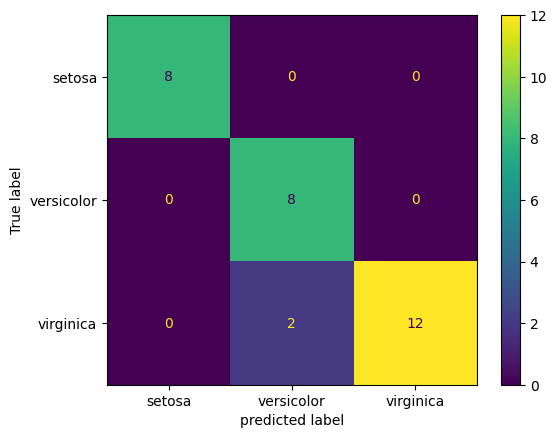

In [44]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['setosa', 'versicolor', 'virginica'])
cm_display.plot()
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()